In [17]:
#importing all necessary libraries
import os
import re

#importing libraries needed for data analysis
import numpy as np
import pandas as pd

#importing libraries needed for data visualization
import matplotlib.pyplot as plt

#libraries used for analysing images
import skimage.io
import skimage.feature
import skimage.transform
from glob import glob

In [2]:
#extract the data from the folder
folders = os.listdir('data')

In [3]:
print(folders)

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigeonHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']


In [9]:
glob('./data/{}/*.jpg'.format('BearHead'))

['./data/BearHead\\bearfrontal0001.jpg',
 './data/BearHead\\bearfrontal0002.jpg',
 './data/BearHead\\bearfrontal0003.jpg',
 './data/BearHead\\bearfrontal0004.jpg',
 './data/BearHead\\bearfrontal0005.jpg',
 './data/BearHead\\bearfrontal0006.jpg',
 './data/BearHead\\bearfrontal0007.jpg',
 './data/BearHead\\bearfrontal0008.jpg',
 './data/BearHead\\bearfrontal0009.jpg',
 './data/BearHead\\bearfrontal0010.jpg',
 './data/BearHead\\bearfrontal0011.jpg',
 './data/BearHead\\bearfrontal0012.jpg',
 './data/BearHead\\bearfrontal0013.jpg',
 './data/BearHead\\bearfrontal0014.jpg',
 './data/BearHead\\bearfrontal0015.jpg',
 './data/BearHead\\bearfrontal0016.jpg',
 './data/BearHead\\bearfrontal0017.jpg',
 './data/BearHead\\bearfrontal0018.jpg',
 './data/BearHead\\bearfrontal0019.jpg',
 './data/BearHead\\bearfrontal0020.jpg',
 './data/BearHead\\bearfrontal0021.jpg',
 './data/BearHead\\bearfrontal0022.jpg',
 './data/BearHead\\bearfrontal0023.jpg',
 './data/BearHead\\bearfrontal0024.jpg',
 './data/BearHea

In [11]:
#for each and every class
path = []
for fol in folders:
    path += glob('./data/{}/*.jpg'.format(fol))

In [18]:
#reading all images
all_images = skimage.io.ImageCollection(path)

In [19]:
print("Number of images: ",len(all_images))

Number of images:  2057


In [30]:
#labelling the each class
def labelling_class(t):
    try:
        label = re.search(r'./data/(.*?)Head\\',t).group(1)
    except:
        label = re.search(r'./data/(.*?)\\',t).group(1)
    label = label.lower()
    return label

In [31]:
Labels = list(map(labelling_class,all_images.files))

In [39]:
#unique are
unique_labels = set(Labels)
print(unique_labels)

{'tiger', 'sheep', 'panda', 'cow', 'elephant', 'pigeon', 'natural', 'chicken', 'eagle', 'human', 'monkey', 'rabbit', 'wolf', 'mouse', 'dog', 'bear', 'deer', 'lion', 'cat', 'duck'}


In [35]:
def image(x):
    return x

all_images_array = np.array(list(map(image,all_images)))

In [36]:
print("Shape of array obtained now is: ",all_images_array.shape)

Shape of array obtained now is:  (2057, 80, 80, 3)


In [40]:
final_data = dict()
final_data['data'] = all_images_array
final_data['target'] = Labels
final_data['labels'] = unique_labels

**Saving the data into pickle file**

In [42]:
import pickle
pickle.dump(final_data,open('data_animals.pickle','wb'))

# Visualization of the Data

In [45]:
import collections
print(collections.Counter(Labels))

Counter({'cat': 159, 'dog': 132, 'panda': 118, 'pigeon': 115, 'tiger': 113, 'cow': 103, 'deer': 103, 'duck': 103, 'lion': 102, 'bear': 101, 'chicken': 100, 'eagle': 100, 'elephant': 100, 'human': 100, 'monkey': 100, 'mouse': 100, 'rabbit': 100, 'sheep': 100, 'wolf': 100, 'natural': 8})


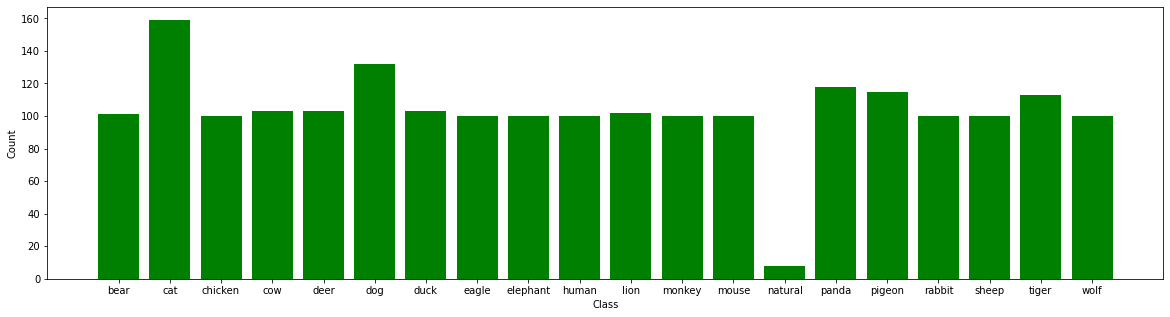

In [50]:
plt.figure(figsize=(20,5))
plt.bar(collections.Counter(Labels).keys(),collections.Counter(Labels).values(),color='green')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

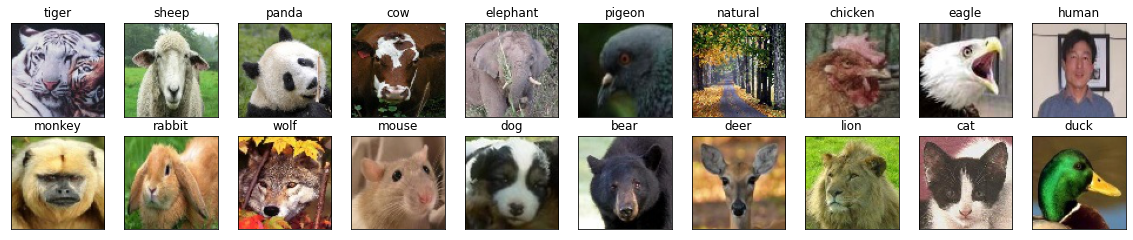

In [61]:
##classes we have
plt.figure(figsize=(20,10))
for i,c in enumerate(final_data['labels']):
    index = final_data['target'].index(c)
    img = final_data['data'][index]
    
    plt.subplot(5,10,i+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(c)